**Does Covid-19 have the same impact on the developed countries and the developing countries's employement?**

> Indented block



In [1]:
# Author: Jiayi Zhou
# Email: jiayizhou@berkeley.edu
# Course: DIGHUM100 
# Instructor: Adam Anderson

In [2]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [6]:
# Imported the libraries needed by this project, this code has referenced the Data8 course 
# taught at Berkeley during Srping 2020. 
import numpy as np
import pandas as pd
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


In [7]:
# Instructions for dataset import
# Step 1: Save the employment_data.csv somewhere in your drive. 
# Step 2: Click on the "File" button on the left vertical bar. 
# Step 3: Find employment_data.csv, right click, and copy the path. 
# Step 4: Paste the path in the parentheses after Table.read_table below. 

In [8]:
# imported the employment dataset. The dummy variable is added by myself according to the United Nation's publication. 
# I have categorized all the transitioning countries into developing countries, as they are not yet fully developed 
# by definition. 
employment = Table.read_table("/content/drive/MyDrive/Dataset for DIGHUM100/employment_data.csv")
employment

country,total_weekly_hours_worked(estimates_in_thousands),percentage_of_working_hrs_lost,percent_hours_lost_40hrs_per_week,percent_hours_lost_48hrs_per_week,labour_dependency_ratio,employed_female_25+_2019,employed_male_25+_2019,ratio_of_weekly_hours_worked_by_population_age_15-64,Developing Country
Afghanistan,350286,6.5,607.476,506.23,3.57,1334.24,5424.91,16.2,1
Angola,457913,8.6,1075.84,896.532,1.7,4612.11,4724.67,27.1,1
Albania,49922.5,3.9,51.087,42.572,1.77,500.112,651.87,25.5,1
United Arab Emirates,320690,9.3,824.579,687.149,0.41,996.03,5111.77,38.6,1
Argentina,525994,21,3492.56,2910.47,1.43,7264.33,9496.19,18.1,1
Armenia,31639,16.8,159.418,132.848,1.72,407.158,519.975,15.8,1
Australia,403947,4.7,503.053,419.211,0.99,5017.15,5849.21,24.6,0
Austria,142519,10.5,417.616,348.013,1.05,1843.94,2109.05,23.8,0
Azerbaijan,153216,14.1,630.631,525.526,1.13,2106.55,2237.43,21.7,1
Burundi,203900,-0.1,-4.467,-3.723,1.36,1931.62,1838.08,32.7,1


In [9]:
# the number of countries that are included in the datasets
len(employment.column('country'))

189

In [10]:
# the proportion of countries in the table that is a developing country
np.average(employment.column('Developing Country') == 1)

0.8095238095238095

In [11]:
# selected all the countries that are developing countries
employment_developing = employment.where('Developing Country', are.equal_to(1))
# calculated the average percentage of working hours loss in the developing countries
developing_percentage_working_hours_lost = np.average(employment_developing.column('percentage_of_working_hrs_lost'))
developing_percentage_working_hours_lost                                                                                                                

9.169281045751635

In [12]:
# selected all the countries that are developed countries
employment_developed = employment.where('Developing Country', are.equal_to(0))
# calculated the average percentage of working hours loss in the developed countries
developed_percentage_working_hours_lost = np.average(employment_developed.column('percentage_of_working_hrs_lost'))
developed_percentage_working_hours_lost

7.319444444444445

In [13]:
# calculated the dependency ratio in the developing countries. 
developing_dependency_ratio = np.average(employment_developing.column('labour_dependency_ratio'))
developing_dependency_ratio

1.7208496732026142

In [14]:
# calculated the dependency ratio in the developed countries. 
developed_dependency_ratio = np.average(employment_developed.column('labour_dependency_ratio'))
developed_dependency_ratio

1.2297222222222224

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:483: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


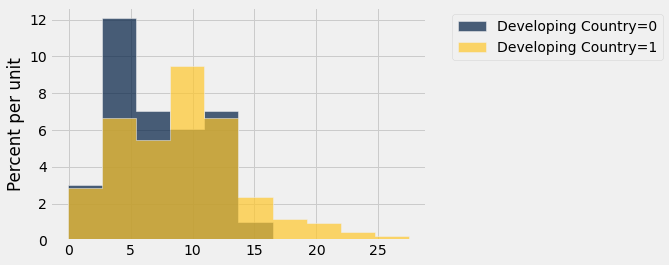

In [15]:
# Visualization 1: percentage of working hours lost in the developed/developing countries.
working_hour_visualization= employment.select('Developing Country', 'percentage_of_working_hrs_lost')
working_hour_visualization.hist('percentage_of_working_hrs_lost', group = 'Developing Country')

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:483: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


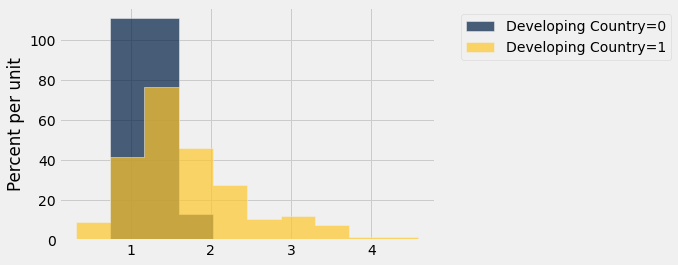

In [16]:
# Visualization 2: labour dependency ratios in the developed/developing countries.
dependency_visualization = employment.select('Developing Country', 'labour_dependency_ratio')
dependency_visualization.hist('labour_dependency_ratio', group = 'Developing Country')

In [17]:
# Investigate whether Covid-19 has impacted the employment rates of thedeveloped and developing countries
# differently by conducting a hypothesis testing.

In [18]:
# AB Testing: Does the percentage of working hours lost in the developed countries come from the same underlying 
# distribution with the developing countries? 
# Null Hypothesis: In the world, the percentage of weekly working hours lost in the developing countries and the
# developed countries are the same. 
# Alternative Hypothesis: In the world, the percentage of weekly working hours lost in the developing countries is more
# than the developed countries. 
# Test Statistics: Percentage of weekly working hours lost in developing countries - in the developed countries. 
# Positive test statistics favor the alternative.

# Reference: The coding of this AB Testing and P-value calculation were taught in DATA8 course which I took at Berkeley
# during Spring 2020. 

In [19]:
# Select only the percentage of working hour loss column and the dummy variable "Developing Country"
AB_Testing_table = employment.select('Developing Country','percentage_of_working_hrs_lost')
AB_Testing_table

Developing Country,percentage_of_working_hrs_lost
1,6.5
1,8.6
1,3.9
1,9.3
1,21
1,16.8
0,4.7
0,10.5
1,14.1
1,-0.1


In [20]:
# Calculate the observed statistics 
Average_developing = np.mean(AB_Testing_table.where('Developing Country', 1).column('percentage_of_working_hrs_lost'))
Average_developed = np.mean(AB_Testing_table.where('Developing Country', 0).column('percentage_of_working_hrs_lost'))
observed_statistics = Average_developing - Average_developed
observed_statistics

1.8498366013071905

In [21]:
# Shuffle the dummy variable column 
Shuffle = employment.sample(with_replacement = False).column('Developing Country')

In [22]:
# Combine the shuffled column with the original table 
AB_Testing = AB_Testing_table.with_column('Shuffled Developing Country', Shuffle)
AB_Testing

Developing Country,percentage_of_working_hrs_lost,Shuffled Developing Country
1,6.5,1
1,8.6,1
1,3.9,1
1,9.3,1
1,21,1
1,16.8,1
0,4.7,1
0,10.5,1
1,14.1,1
1,-0.1,1


In [24]:
# Created a stimulation function
def one_stimulation(table, label, group_label):
    # Created a shuffled_column with the group label
    Shuffled_column = table.sample(with_replacement = False).column(group_label)
    # Added the shuffled column to the originla table
    original_and_shuffled = table.with_column('Shuffled_label', Shuffled_column)
    # Selected only the developing country after shuffling
    shuffled_developing = original_and_shuffled.where('Shuffled_label', 1)
    # Selected only the developed country after shuffling
    shuffled_developed = original_and_shuffled.where('Shuffled_label', 0)
    # Calculated the difference
    difference = np.average(shuffled_developing.column(label)) - np.average(shuffled_developed.column(label))
    return difference 

In [25]:
differences_stimulation_results = make_array()

# 5000 trials of shuffling and difference calculation
for i in np.arange(5000):
    new_difference = one_stimulation(AB_Testing_table, 'percentage_of_working_hrs_lost', 'Developing Country')
    differences_stimulation_results = np.append(differences_stimulation_results, new_difference)

Observed Statistics: 1.8498366013071905


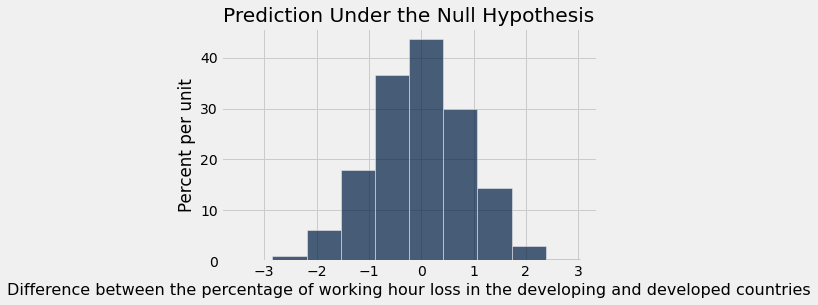

In [26]:
Table().with_column('Difference between the percentage of working hour loss in the developing and developed countries', differences_stimulation_results).hist()
print('Observed Statistics:', observed_statistics)
plots.title('Prediction Under the Null Hypothesis');

In [27]:
# p-value calculation
sum(differences_stimulation_results >= observed_statistics) / len(differences_stimulation_results)

0.0158

In [28]:
# Results Interpretation: If we take 5% as the significance level, the observed_statistics < 0.05. We would reject the null hypothesis 
# and conclude that the percentage of working hour loss in the developing countries is larger than the percentage of 
# working hour loss in the developed countries under the impact of covid-19. 